In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:

# 1. import airquality.csv
air = pd.read_csv('airquality.csv')
air_quality = pd.DataFrame(air)

air_quality.shape

(153, 6)

In [91]:
# 2. Ozone, SolarRad, Wind and Temp columns replace any missing values w/ median value

# Number of NaN Entries for Ozone, SolarRad, Wind and Temp

In [92]:
print("The Number of NaN entries in Ozone:")
print(air_quality['Ozone'].isnull().sum())
print("The Number of NaN entries in SolarRad:")
print(air_quality['SolarRad'].isnull().sum())
print("The Number of NaN entries in Wind:")
print(air_quality['Wind'].isnull().sum())
print("The Number of NaN entries in Temp:")
print(air_quality['Temp'].isnull().sum())

The Number of NaN entries in Ozone:
37
The Number of NaN entries in SolarRad:
7
The Number of NaN entries in Wind:
0
The Number of NaN entries in Temp:
0


# Remove NaN

In [93]:
# Replace NaN with median
air_quality['Ozone'] = air_quality['Ozone'].fillna((air_quality['Ozone'].median()))
air_quality['SolarRad'] = air_quality['SolarRad'].fillna((air_quality['SolarRad'].median()))

In [94]:
#check is NaN is gone
print(air_quality['Ozone'].isnull().sum())
print(air_quality['SolarRad'].isnull().sum())

0
0


# Generate Box-plot

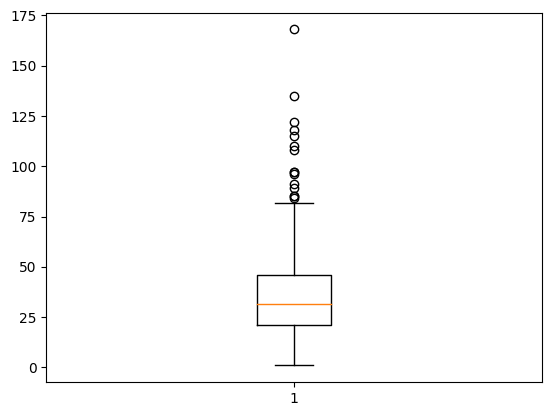

In [95]:
# 3. Generate a box plot for the data frame for the Ozone column.
# What is the meaning of each of the horizontal lines in the box plot?

plt.boxplot(air_quality['Ozone'])
plt.show()

# Remove Outliers

In [102]:
# 4. Remove from your data frame any outliers in the Ozone column.
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    print(removed_outliers.shape)
    plt.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

In [106]:
# find the upper quartile to remove upper outliers
air_count = len(air_quality.index)
upper_q = 3/4 * ( air_count + 37)

print(upper_q)

142.5


**5. How many rows were removed?**

     4 (153,6) to (149,6)
     *edit:*
     38 (153,6) to (115,6)

**6. Do you think it was proper to remove rows just because the value was above or below a certain amount?  Why or why not?  If you need more information, what would you ask?**

considering we added manufactured data to this table, even if it is the median of the ranges, I do think it was proper to remove the data.

we are adding a manufactured element to our dataset, because of this any outliers could be inaccurate and therefor tainting out dataset.

**6B. If you need more information, what would you ask?**

I would begin to ask, what is the significants of our data and our numerical ranges?

I would also like to know, what is the end goal for the analysis? This would help me guage the importance of each aspect of data.


# ReGenerate Box-plot

**7. Re-generate your box plot for the Ozone column from the data frame with the outliers removed.**
**If outliers are still shown, why did this happen?**

When running a instance i was able to remove outliers and display a clean boxplot.On a second run i was unable to remove the outliers.

1. It is either a memory issue

2. The way I calculate the upper_q may be effecting what gets removed.

but it also looks like shape changed from (153,6) to (149,6)

*edit: i went back and changed the way the upper q works based on the numbe of NaN objects removed.*

(115, 6)


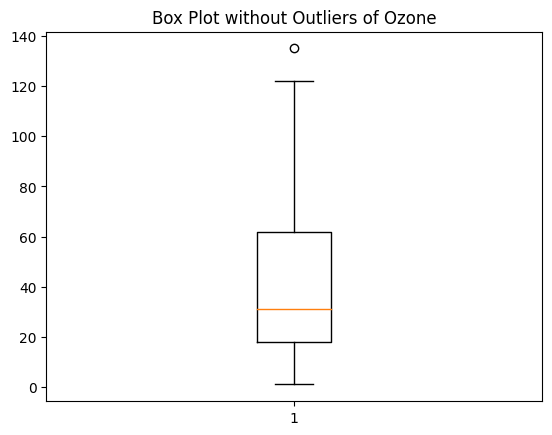

In [107]:
no_outliers = removal_box_plot(air_quality, 'Ozone', upper_q)